# 데이터 전처리

KoGes 데이터 전처리하기
전처리 절차

1. 남성/여성/전체 데이터셋 분리
2. 각각 사용할 독립변수, 종속변수 행 추출
3. 질환유무, 약물력 변수 가공
4. 가족과의 관계 변수 가공
    - 부, 모, 형제자매, 기타 -> 부모, 형제자매, 기타, 해당없음
    - 목록
      - AS1_FMDMREL
      - AS1_FMHEREL
      - AS1_FMOSREL
      - AS1_FMCVAREL
      - AS1_FMCVBREL
      - AS1_FMCDREL
      - AS1_FMCHREL
      - AS1_FMPVREL
      - AS1_FMLPREL
      - AS1_FMGTREL
5. 종속변수 AS1_OP 가공
    - AS1_DT
    - AS1_MT
6. 데이터셋을 DataFrame으로 불러오고 독립변수는 4가지로 분류 (binary, cath0, cath1, cnt, tumor_name)
  - binary: 범주형(binary) 변수, 0 / 1 로 변경
  -  catH0: 계층 없는 범주형(>03) 변수, 벡터화(one-hot-encoding)
  -  catH1: 계층 있는 범주형 변수, 표준화
  -    cnt: 연속형 변수, 정규화, 표준화
  - tumor_name
7. 결측값 제거 : 일단 0으로 대치
8. 연속형 변수 스케일링
  - 정규화(normalization): 0, 1
  - 표준화(standardization): 평균: 0 표준편차: 1
  - 계층화(quantile transform): 4분위 수
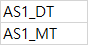

In [102]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer

In [103]:
# 데이터셋 불러오기
# dataset = pd.read_csv("dataset/Dataset_OP_230316_raw.csv", index_col=0, na_values=[77777, 99999, '#NULL!', ' '])
dataset = pd.read_csv("dataset/Dataset_OP_230330_raw.csv", index_col=0, na_values=[77777, 99999, '#NULL!', ' '])
dataset

C:\Users\sh22h\AppData\Local\Temp\ipykernel_24600\3039081531.py:3: DtypeWarning: Columns (82,106,493) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("dataset/Dataset_OP_230330_raw.csv", index_col=0, na_values=[77777, 99999, '#NULL!', ' '])


,AS1_AREA,AS1_EDATE1,AS1_SEX,AS1_AGE,AS1_JOBB,AS1_EDUA,AS1_RSDYR,AS1_HOUSETY,AS1_HOUSEPS,AS1_INCOME,...,AS1_CH14,AS1_CH16,AS1_CH18,Unnamed: 801,AS1_PDCL.1,AS1_TRTCL.1,AS1_CH14.1,AS1_CH18.1,AS1_SPFEV_FVCB.2,AS1_COPD_D
RID,,,,,,,,,,,,,,,,,,,,,
EPI20_026_3_000001,1,200110,2,61,1.0,1.0,60.0,1.0,2.0,1.0,...,0.0,0.0,0.0,NaN,1.0,NaN,0.0,0.0,0.723214,1
EPI20_026_3_000002,1,200112,1,62,3.0,1.0,63.0,1.0,2.0,1.0,...,0.0,0.0,0.0,NaN,2.0,NaN,0.0,0.0,0.717391,2
EPI20_026_3_000003,2,200204,1,43,2.0,5.0,9.0,2.0,2.0,4.0,...,0.0,0.0,0.0,NaN,1.0,NaN,0.0,0.0,0.773034,1
EPI20_026_3_000004,2,200111,1,44,6.0,3.0,5.0,3.0,2.0,5.0,...,0.0,0.0,0.0,NaN,1.0,1.0,0.0,0.0,0.760593,1
EPI20_026_3_000005,1,200212,1,54,3.0,5.0,44.0,1.0,2.0,5.0,...,0.0,0.0,0.0,NaN,1.0,NaN,0.0,0.0,0.753351,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EPI20_026_3_010026,1,200210,2,50,1.0,1.0,50.0,1.0,2.0,1.0,...,0.0,0.0,0.0,NaN,1.0,1.0,0.0,0.0,0.760135,1
EPI20_026_3_010027,1,200205,1,57,3.0,2.0,58.0,1.0,2.0,3.0,...,0.0,0.0,0.0,NaN,1.0,1.0,0.0,0.0,0.724706,1
EPI20_026_3_010028,1,200209,1,69,3.0,1.0,70.0,1.0,2.0,1.0,...,0.0,0.0,0.0,NaN,1.0,1.0,0.0,0.0,0.689459,2


In [104]:
# 데이터셋 분리
# binary, cath0, cath1, cnt, tumor_name, label

var_to_use = pd.read_csv("dataset/var_to_use_2023-03-30T2240I.csv")
# var_to_use['서술형..?'].dropna()

In [105]:
dataset.dropna(subset=['AS1_DT', 'AS1_MT'], inplace=True)
dataset['OP'] = np.where((dataset['AS1_DT'] <= -2.5) | (dataset['AS1_MT'] <= -2.5), 1, 0)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9100 entries, EPI20_026_3_000001 to EPI20_026_3_010030
Columns: 808 entries, AS1_AREA to OP
dtypes: float64(765), int32(1), int64(38), object(4)
memory usage: 56.1+ MB


## 데이터 가공

- 기존 데이터로 새로운 데이터 만들기
- if 문 쓰면 안됨!
    - The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().
- np.where 사용할 것! 

In [106]:
# 질환유무 가공
disease_list = np.array(['HT', 'DM', 'UL', 'AL', 'MI', 'TH', 'CH', 'CD',
                         'LP', 'AS', 'CL', 'PV', 'KD', 'CV', 'HN', 'GT',
                         'TOTCA1'])
for x in disease_list:
    dataset['AS1_'+x] = np.where((dataset['AS1_PD'+x] == 2) | (dataset['AS1_TRT'+x] == 2), 1, 0)

dataset['AS1_ARRM'] = np.where((dataset['AS1_JOAR'] == 2) | (dataset['AS1_JORM'] == 2) | (dataset['AS1_TRT'+x] == 2), 1, 0)

In [107]:
# 약물력 가공
drug_list = np.array(['ST', 'CP', 'INS', 'HT', 'AR', 'UL', 
                      'TH', 'FH', 'OS', 'DM', 'STK', 'AS', 'LP'])  # CP, HP 제외
for x in drug_list:
    dataset['AS1_DR'+x] = np.where((dataset['AS1_DRUG'+x] == 2) | (dataset['AS1_DRUG'+x+'CU'] == 2), 1, 0)


In [108]:
# 세상에 내 코드는 구데기였어
# 가족력 가공
# N: 가족력 없음, P: parent 부모, S: sibling 형제자매, O: other 기타
# N: REL1A~4A까지 99999
# P: REL1A~4A중 1, 2 있을 때
# S: REL1A~4A중 3 있을 때
# O: REL1A~4A중 4 있을 때

# disease_dict = { # 각 질환별 가족력 있는 가족의 최대 인원
#     'HT': 4,
#     'DM': 4,
#     'CVA': 3,
#     'OS': 2,
#     'CVB': 2,
#     'CD': 2,
#     'PV': 2,
#     'LP': 2,
#     'GT': 2,
#     'CH': 1
# }

# for disease, num_family in disease_dict.items(): # 질환마다 가족 수가 달라 다르게 만듦..?
#     if num_family == 1:
#         dataset['AS1_FM'+disease+'REL_N'] = np.where((dataset['AS1_FM'+disease+'REL1A'] == 99999), 1, 0)
#         for i in range(1, 5):
#             for f in ['P', 'S', 'O']:
#                 dataset['AS1_FM'+disease+'REL_'+f] = np.where(dataset['AS1_FM'+disease+'REL1A'] == i, 1, 0)
#     elif num_family == 2:
#         dataset['AS1_FM'+disease+'REL_N'] = np.where((dataset['AS1_FM'+disease+'REL1A'] == 99999) &
#                                                      (dataset['AS1_FM'+disease+'REL2A'] == 99999), 1, 0)
#         for i in range(num_family):
#             for f in ['P', 'S', 'O']:
#                 dataset['AS1_FM'+disease+'REL_'+f] = np.where((dataset['AS1_FM'+disease+'REL1A'] == i) |
#                                                               dataset['AS1_FM'+disease+'REL2A'] == i, 1, 0)
#     elif num_family == 3:
#         dataset['AS1_FM'+disease+'REL_N'] = np.where((dataset['AS1_FM'+disease+'REL1A'] == 99999) &
#                                                      (dataset['AS1_FM'+disease+'REL2A'] == 99999) &
#                                                      (dataset['AS1_FM'+disease+'REL3A'] == 99999), 1, 0)
#         for i in range(num_family):
#             for f in ['P', 'S', 'O']:
#                 dataset['AS1_FM'+disease+'REL_'+f] = np.where((dataset['AS1_FM'+disease+'REL1A'] == i) |
#                                                               (dataset['AS1_FM'+disease+'REL2A'] == i) |
#                                                               (dataset['AS1_FM'+disease+'REL3A'] == i), 1, 0)
#     elif num_family == 4:
#         dataset['AS1_FM'+disease+'REL_N'] = np.where((dataset['AS1_FM'+disease+'REL1A'] == 99999) &
#                                                      (dataset['AS1_FM'+disease+'REL2A'] == 99999) &
#                                                      (dataset['AS1_FM'+disease+'REL3A'] == 99999) &
#                                                      (dataset['AS1_FM'+disease+'REL4A'] == 99999), 1, 0)
#         for i in range(num_family):
#             for f in ['P', 'S', 'O']:
#                 dataset['AS1_FM'+disease+'REL_'+f] = np.where((dataset['AS1_FM'+disease+'REL1A'] == i) |
#                                                               (dataset['AS1_FM'+disease+'REL2A'] == i) |
#                                                               (dataset['AS1_FM'+disease+'REL3A'] == i) |
#                                                               (dataset['AS1_FM'+disease+'REL4A'] == i), 1, 0)

# df1 = dataset[[f'AS1_FM{disease}REL_{family}' for disease in disease_dict.keys() for family in ['N', 'P', 'S', 'O']]]
   

In [109]:
# 와 ChatGPT가 아니었다면 np.all과 np.any를 몰랐을거야!
# 세상에 내 코드는 구데기였어
# 가족력 가공
# N: 가족력 없음, P: parent 부모, S: sibling 형제자매, O: other 기타
# N: REL1A~4A까지 99999
# P: REL1A~4A중 1, 2 있을 때
# S: REL1A~4A중 3 있을 때
# O: REL1A~4A중 4 있을 때

disease_dict = {
    'HT': 4,
    'DM': 4,
    'CVA': 3,
    'HE': 2,
    'OS': 2,
    'CVB': 2,
    'CD': 2,
    'PV': 2,
    'LP': 2,
    'GT': 2,
    'CH': 1
}

for disease, num_family in disease_dict.items():
    dataset[f'AS1_FM{disease}REL_N'] = np.all(dataset[[f'AS1_FM{disease}REL{i}A' for i in range(1, num_family+1)]] == 99999, axis=1).astype(int)
    dataset[f'AS1_FM{disease}REL_P'] = np.any(dataset[[f'AS1_FM{disease}REL{i}A' for i in range(1, num_family+1)]] <= 2, axis=1).astype(int)
    dataset[f'AS1_FM{disease}REL_S'] = np.any(dataset[[f'AS1_FM{disease}REL{i}A' for i in range(1, num_family+1)]] == 3, axis=1).astype(int)
    dataset[f'AS1_FM{disease}REL_O'] = np.any(dataset[[f'AS1_FM{disease}REL{i}A' for i in range(1, num_family+1)]] == 4, axis=1).astype(int)

In [110]:
dataset[[f'AS1_FM{disease}REL_{family}' for disease in disease_dict.keys() for family in ['N', 'P', 'S', 'O']]]

,AS1_FMHTREL_N,AS1_FMHTREL_P,AS1_FMHTREL_S,AS1_FMHTREL_O,AS1_FMDMREL_N,AS1_FMDMREL_P,AS1_FMDMREL_S,AS1_FMDMREL_O,AS1_FMCVAREL_N,AS1_FMCVAREL_P,...,AS1_FMLPREL_S,AS1_FMLPREL_O,AS1_FMGTREL_N,AS1_FMGTREL_P,AS1_FMGTREL_S,AS1_FMGTREL_O,AS1_FMCHREL_N,AS1_FMCHREL_P,AS1_FMCHREL_S,AS1_FMCHREL_O
RID,,,,,,,,,,,,,,,,,,,,,
EPI20_026_3_000001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EPI20_026_3_000002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EPI20_026_3_000003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EPI20_026_3_000004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EPI20_026_3_000005,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EPI20_026_3_010026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EPI20_026_3_010027,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EPI20_026_3_010028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
# 여성력 가공
# 남자일 경우: 0 여자일 경우: 그대로
for x in ['CP', 'FH']:
    dataset['AS1_DR'+x] = np.where(dataset['AS1_SEX'] == '1', 
                                   0, 
                                   np.where((dataset['AS1_DRUG'+x] == 2) | (dataset['AS1_DRUG'+x+'CU'] == 2), 2, 1))
    
women = np.array(['AS1_PREG', 'AS1_HYST', 'AS1_HYSTOVARYW', 'AS1_OVARYW', 
                  'AS1_OBGYOP', 'AS1_BRCA', 'AS1_DRCP', 'AS1_DRFH'])

for x in women:
    dataset[x] = np.where((dataset['AS1_SEX'] == 1), 0, dataset[x])

In [112]:
raw_binary = dataset.reindex(columns=(var_to_use['binary'].dropna()))
raw_cath0 = dataset.reindex(columns=(var_to_use['cath0'].dropna()))
raw_cath1 = dataset.reindex(columns=(var_to_use['cath1'].dropna()))
raw_cnt = dataset.reindex(columns=(var_to_use['cnt'].dropna()))
raw_tumor_name = dataset.reindex(columns=(var_to_use['tumor_name'].dropna()))
raw_label = dataset.reindex(columns=(var_to_use['dependent'].dropna()))

In [113]:
# null인 행이 있다.... 코드북과 데이터셋이 불일치한다.
target = raw_cnt
null_cell = pd.Series(index=target.columns)
null_cell = null_cell[target.isnull().sum() >= len(dataset)]  # 코드북에 없는 데이터 리스트
null_cell

C:\Users\sh22h\AppData\Local\Temp\ipykernel_24600\3687536406.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  null_cell = pd.Series(index=target.columns)


Series([], dtype: float64)

In [114]:
raw_label

dependent,AS1_DT,AS1_MT
RID,,
EPI20_026_3_000001,-1.0,-1.1
EPI20_026_3_000002,1.4,1.0
EPI20_026_3_000003,3.6,1.6
EPI20_026_3_000004,0.1,0.2
EPI20_026_3_000005,-0.4,0.3
...,...,...
EPI20_026_3_010026,-1.4,-3.3
EPI20_026_3_010027,0.7,2.2
EPI20_026_3_010028,2.3,0.6


### 문제점

- 일부 데이터의 많은 결측값
  - 77777 -> 0
    - AS1_TOTALC
    - AS1_HVSMAM
  - 99999 -> ?
    - AS1_FMOSREL1A
    - AS1_CA_U
    - AS1_NA_U
    - AS1_K_U

  - 변수 정리할 때까지, 그냥 0으로 대체


- 여성력 관련 변수 처리 방법?
  - AS1_MNSAG
  - AS1_HYST
  - AS1_HYSTOVARYW
  - AS1_OVARYW
  - AS1_BRCA

In [115]:
raw_binary = raw_binary.fillna(0)
raw_cath0 = raw_cath0.fillna(0)
raw_cath1 = raw_cath1.fillna(0)
raw_cnt = raw_cnt.fillna(0)
raw_tumor_name = raw_tumor_name.fillna(0)

raw_label = raw_label.fillna(0)

In [116]:
binary = pd.DataFrame(QuantileTransformer().fit_transform(raw_binary), index=dataset.index, columns=raw_binary.columns).astype('float')
cath0 = pd.get_dummies(raw_cath0, columns=raw_cath0.columns, drop_first=True, dtype='float64') # one-hot-encoding
cath1 = pd.DataFrame(QuantileTransformer().fit_transform(raw_cath1), index=dataset.index, columns=raw_cath1.columns).astype('float')
cnt = pd.DataFrame(QuantileTransformer().fit_transform(raw_cnt), index=dataset.index, columns=raw_cnt.columns).astype('float')
tumor_name = pd.get_dummies(raw_tumor_name, columns=raw_tumor_name.columns, drop_first=True, dtype='float64') # one-hot-encoding

label = pd.DataFrame(QuantileTransformer().fit_transform(raw_label), index=dataset.index, columns=raw_label.columns).astype('float')

In [118]:
X = pd.concat([binary, cath0, cath1, cnt, tumor_name], axis=1)
# X = pd.concat([raw_binary, categoryH0, categoryH1, ctn, nutrients, FM], axis=1)
y = dataset['OP']
# raw_y = pd.DataFrame(QuantileTransformer().fit_transform(label), index=dataset.index, columns=label.columns)

In [119]:
y.value_counts()

0    8087
1    1013
Name: OP, dtype: int64

In [120]:
X.to_csv("dataset/scaled/X_230330.csv")
y.to_csv("dataset/scaled/y_230330.csv")

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=415)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7280, 1415) (1820, 1415) (7280,) (1820,)


## 모델 제작 DNN

In [ ]:
UNITS = 32
EPOCH = 128
DROPOUT = 0.05
LEARNINGRATE = 0.01